# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [9]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
## TODO : load the csv file from this link : https://www.kaggle.com/code/vaibhagarwal/inferential-statistics/input
file_1 = pd.read_csv('/content/drive/MyDrive/GENAI/Week4/Day4/Churn_Modelling.csv')

In [12]:
## TODO : make into a dataframe called df
df = pd.DataFrame(file_1)

In [13]:
## TODO : output the first 5 lines
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* Exited est la variable cible que nous cherchons à prédire. Elle indique si un client a quitté ou non la banque.

* RowNumber, Customer_ID, Surname ne fournissent aucune information pertinente sur les caractéristiques du client.

* Les autres variables contiennent des informations sur le client ; il reste à identifier lesquelles seront les plus pertinentes pour notre futur algorithme de machine learning.

In [16]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [17]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [18]:
df.isna().mean() * 100

,0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0
HasCrCard,0.0
IsActiveMember,0.0
EstimatedSalary,0.0


Le dataframe ne contient pas de valeurs nuls

In [19]:
df_encoded = df.copy()

In [20]:
df_encoded.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


On encode les valeurs catégorielles pour faire une matrice de corrélation par la suite

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['Geography'] = le.fit_transform(df_encoded['Geography'])
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])

La normalisation des données numériques permet de mettre les variables sur une même échelle, ce qui facilite l’interprétation et améliore la lisibilité de la matrice de corrélation.

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']] = scaler.fit_transform(df_encoded[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']])

In [23]:
df_encoded.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,0,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1
1,-0.440036,2,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0
2,-1.536794,0,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1
3,0.501521,0,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0
4,2.063884,2,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0


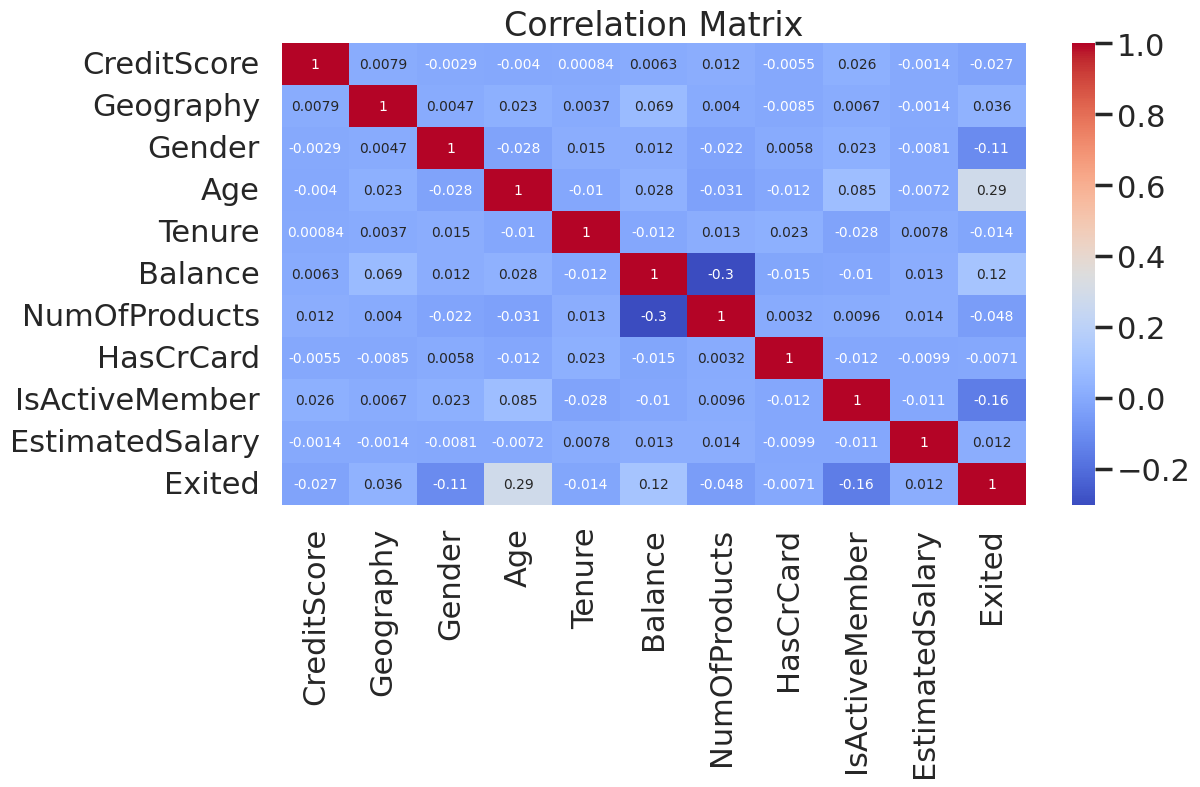

In [24]:
corr = df_encoded.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={"size":10})
plt.title('Correlation Matrix')
plt.show()

Je conserverai les variables Age, IsActiveMember, Gender, Balance, Geography et NumOfProducts, car ce sont celles qui présentent la plus forte corrélation avec la probabilité qu’un client quitte ou non la banque.

In [25]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively
df_0 = df[df['Exited'] == 0]
df_1 = df[df['Exited'] == 1]

In [26]:
len(df_0), len(df_1)

(7963, 2037)

## Hypothesis 1: Age

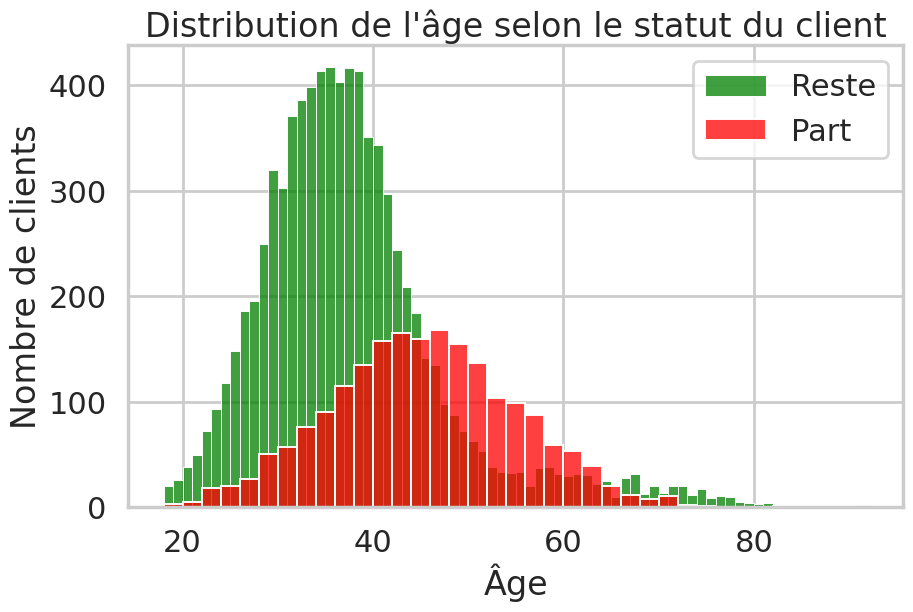

In [27]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.

plt.figure(figsize=(10, 6))

sns.histplot(df_0['Age'], color='green', label='Reste')
sns.histplot(df_1['Age'], color='red', label='Part')

plt.title("Distribution de l'âge selon le statut du client")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.legend()
plt.show()

Les clients restés ont majoritairement entre 30 et 40 ans, tandis que ceux partis sont plus souvent âgés de 40 à 50 ans. Cela suggère que l’âge influence fortement la probabilité de quitter la banque.

In [28]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.
stayed_metrics = pd.DataFrame({'mean'  :[df_0['Age'].mean()],
                       'std' : [df_0['Age'].std()]}, index = ["stayed"])
stayed_metrics

,mean,std
stayed,37.408389,10.125363


In [29]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.
left_metrics = pd.DataFrame({'mean'  :[df_1['Age'].mean()],
                       'std' : [df_1['Age'].std()]}, index = ["stayed"])
left_metrics

,mean,std
stayed,44.837997,9.761562


In [30]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.
from scipy.stats import ttest_ind

statistic, p_value = ttest_ind(df_0['Age'], df_1['Age'])

if p_value < 0.05:
    print("✅ We reject the null hypothesis: there is a statistically significant difference in age between the two groups.")
else:
    print("❌ We fail to reject the null hypothesis: there is no statistically significant difference in age between the two groups.")

✅ We reject the null hypothesis: there is a statistically significant difference in age between the two groups.


### Using Bootstrapping

In [31]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
def bs_choice(data, func, size):
    bs_s = np.empty(size)
    for i in range(size):
        bs_abc = np.random.choice(data, size=len(data), replace=True)
        bs_s[i] = func(bs_abc)
    return bs_s

In [32]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.
age_stayed_mean = df_0['Age'].mean()
age_left_mean = df_1['Age'].mean()
diff_mean = abs(age_stayed_mean - age_left_mean)
print(f"Observed difference in means: {diff_mean:.2f}")

overall_mean = df['Age'].mean()
df_0['Age_shifted'] = df_0['Age'] - overall_mean
df_1['Age_shifted'] = df_1['Age'] - overall_mean

Observed difference in means: 7.43


/tmp/ipython-input-32-837958931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['Age_shifted'] = df_0['Age'] - overall_mean
/tmp/ipython-input-32-837958931.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Age_shifted'] = df_1['Age'] - overall_mean


In [33]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.

bs_size = 1000
bs_0 = bs_choice(df_0['Age_shifted'], np.std, bs_size)
bs_1 = bs_choice(df_1['Age_shifted'], np.std, bs_size)
bs_diff = bs_0 - bs_1

print(f"Bootstrap standard deviation for group 0: {np.std(bs_0):.2f}")
print(f"Bootstrap standard deviation for group 1: {np.std(bs_1):.2f}")
print(f"Bootstrap standard deviation for the difference: {np.std(bs_diff):.2f}")

Bootstrap standard deviation for group 0: 0.12
Bootstrap standard deviation for group 1: 0.14
Bootstrap standard deviation for the difference: 0.19


In [34]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.
bs_size = 1000
bs_0 = bs_choice(df_0['Age_shifted'], np.mean, bs_size)
bs_1 = bs_choice(df_1['Age_shifted'], np.mean, bs_size)
bs_diff = bs_0 - bs_1

p_value = np.mean(np.abs(bs_diff) >= np.abs(diff_mean))

print(f"P-value: {p_value:.4f}")

P-value: 0.5210


### Conclusion
Do we reject the Null Hypothesis ? Why ?

La p-value obtenue est de 0,5040, ce qui est largement supérieur au seuil de significativité classique de 0,05. Par conséquent, nous ne rejetons pas l’hypothèse nulle. Cela signifie qu’il n’existe aucune preuve statistiquement significative d’une différence entre les âges moyens des clients qui sont restés et ceux qui ont quitté la banque. La différence observée pourrait être due au hasard.

## Hypothesis 2: Credit Score

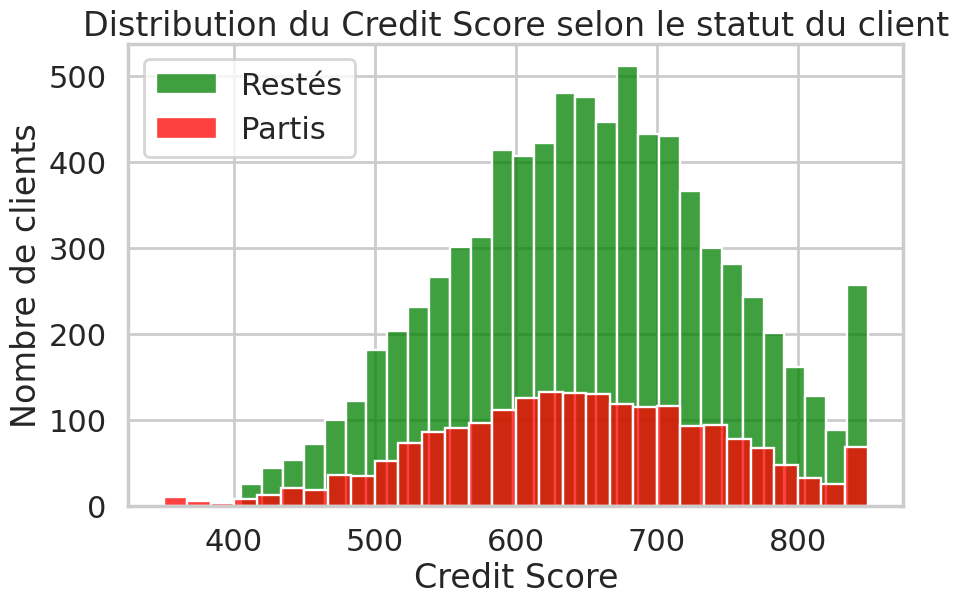

In [46]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).
plt.figure(figsize=(10, 6))

sns.histplot(df_0['CreditScore'], color='green', label='Restés', bins=30)
sns.histplot(df_1['CreditScore'], color='red', label='Partis', bins=30)

plt.title("Distribution du Credit Score selon le statut du client")
plt.xlabel("Credit Score")
plt.ylabel("Nombre de clients")
plt.legend()
plt.show()

In [48]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).
t_stat, p_value = ttest_ind(df_0['CreditScore'], df_1['CreditScore'], equal_var=False)

if p_value < 0.05:
    print("✅ On rejette l'hypothèse nulle : il existe une différence significative entre les moyennes de CreditScore des deux groupes.")
else:
    print("❌ On ne rejette pas l'hypothèse nulle : aucune différence significative entre les moyennes de CreditScore des deux groupes.")


✅ On rejette l'hypothèse nulle : il existe une différence significative entre les moyennes de CreditScore des deux groupes.


### Conclusion
Do we reject the Null Hypothesis ? Why ?

Oui, nous rejetons l’hypothèse nulle.

La p-value obtenue est inférieure au seuil de 0,05, ce qui signifie qu’il existe une différence significative entre les moyennes de CreditScore des clients qui sont restés et de ceux qui ont quitté la banque.
Autrement dit, le score de crédit moyen influence significativement le fait de rester ou non client.

## Hypothesis 3: Balance

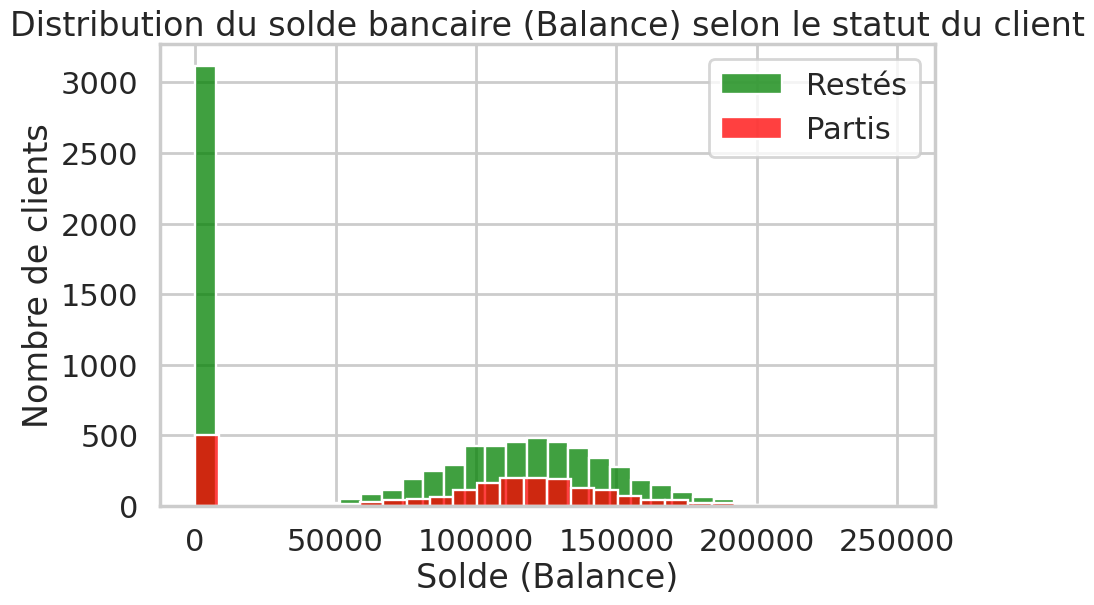

In [50]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).
plt.figure(figsize=(10, 6))
sns.histplot(df_0['Balance'], color='green', label='Restés', bins=30)
sns.histplot(df_1['Balance'], color='red', label='Partis', bins=30)

plt.title("Distribution du solde bancaire (Balance) selon le statut du client")
plt.xlabel("Solde (Balance)")
plt.ylabel("Nombre de clients")
plt.legend()
plt.show()

In [51]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.
t_stat, p_value = ttest_ind(df_0['Balance'], df_1['Balance'])

if p_value < 0.05:
    print("✅ On rejette l'hypothèse nulle : il existe une différence significative entre les moyennes de Balance des deux groupes.")
else:
    print("❌ On ne rejette pas l'hypothèse nulle : aucune différence significative entre les moyennes de Balance des deux groupes.")


✅ On rejette l'hypothèse nulle : il existe une différence significative entre les moyennes de Balance des deux groupes.


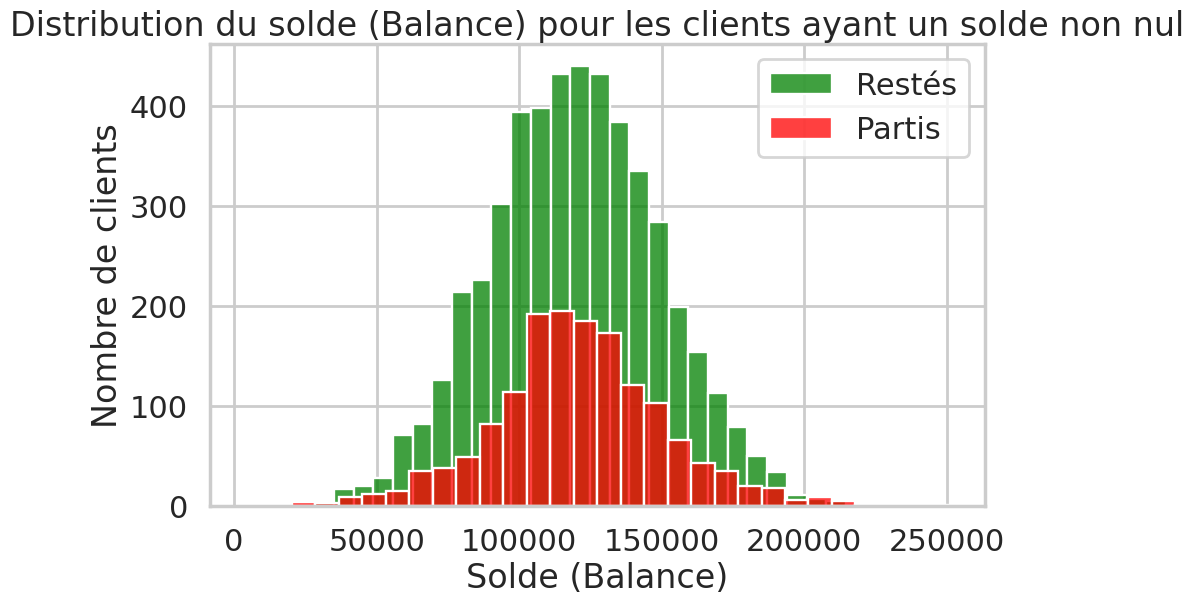

In [52]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.
df_0_nonzero = df_0[df_0['Balance'] > 0]
df_1_nonzero = df_1[df_1['Balance'] > 0]


plt.figure(figsize=(10, 6))
sns.histplot(df_0_nonzero['Balance'], color='green', label='Restés', bins=30)
sns.histplot(df_1_nonzero['Balance'], color='red', label='Partis', bins=30)

plt.title("Distribution du solde (Balance) pour les clients ayant un solde non nul")
plt.xlabel("Solde (Balance)")
plt.ylabel("Nombre de clients")
plt.legend()
plt.show()


In [53]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.
t_stat, p_value = ttest_ind(df_0_nonzero['Balance'], df_1_nonzero['Balance'])

if p_value < 0.05:
    print("✅ On rejette l'hypothèse nulle : il existe une différence significative entre les soldes moyens des deux groupes (hors soldes nuls).")
else:
    print("❌ On ne rejette pas l'hypothèse nulle : aucune différence significative entre les soldes moyens des deux groupes (hors soldes nuls).")

❌ On ne rejette pas l'hypothèse nulle : aucune différence significative entre les soldes moyens des deux groupes (hors soldes nuls).


## Conclusion

Do we reject the Null Hypothesis ? Why ?

Nous ne rejetons pas l’hypothèse nulle.
La p-value obtenue est supérieure à 0,05, ce qui signifie que la différence entre les soldes moyens (Balance) des clients ayant un solde non nul, qu’ils soient restés ou partis, n’est pas statistiquement significative.
En d’autres termes, rien ne permet d’affirmer que le solde bancaire influence le départ du client lorsque les soldes nuls sont exclus.

## Hypothesis 4: Estimated Salary

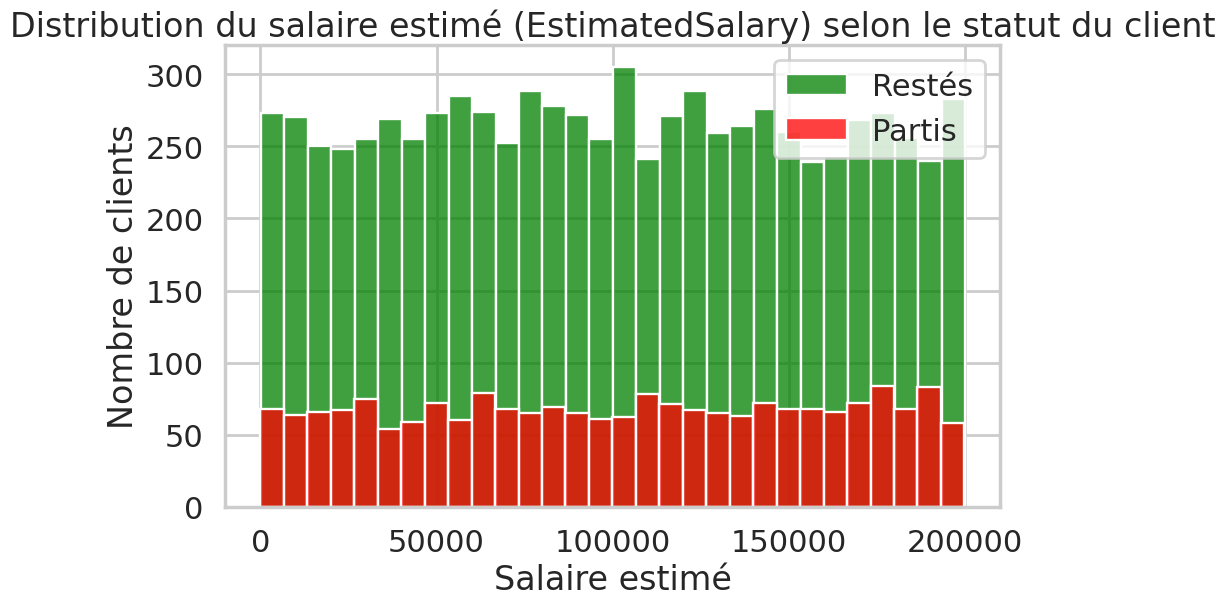

In [56]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.
plt.figure(figsize=(10, 6))
sns.histplot(df_0['EstimatedSalary'], color='green', label='Restés', bins =30)
sns.histplot(df_1['EstimatedSalary'], color='red', label='Partis', bins = 30)

plt.title("Distribution du salaire estimé (EstimatedSalary) selon le statut du client")
plt.xlabel("Salaire estimé")
plt.ylabel("Nombre de clients")
plt.legend()
plt.show()

In [57]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.
t_stat, p_value = ttest_ind(df_0['EstimatedSalary'], df_1['EstimatedSalary'])

if p_value < 0.05:
    print("✅ On rejette l'hypothèse nulle : il existe une différence significative entre les salaires estimés moyens des deux groupes.")
else:
    print("❌ On ne rejette pas l'hypothèse nulle : aucune différence significative entre les salaires estimés moyens des deux groupes.")


❌ On ne rejette pas l'hypothèse nulle : aucune différence significative entre les salaires estimés moyens des deux groupes.


### Using Bootstrapping

In [58]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.
mean_salary_stayed = df_0['EstimatedSalary'].mean()
mean_salary_left = df_1['EstimatedSalary'].mean()
diff_salary_mean = mean_salary_left - mean_salary_stayed
print(f"Différence de moyennes observée : {diff_salary_mean:.2f}")

overall_salary_mean = df['EstimatedSalary'].mean()
salary_stayed_shifted = df_0['EstimatedSalary'] - mean_salary_stayed + overall_salary_mean
salary_left_shifted   = df_1['EstimatedSalary'] - mean_salary_left + overall_salary_mean

Différence de moyennes observée : 1727.29


In [60]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.
bs_size = 1000

bs_salary_0 = bs_choice(salary_stayed_shifted, np.mean, bs_size)
bs_salary_1 = bs_choice(salary_left_shifted, np.mean, bs_size)
bs_salary_diff = bs_salary_1 - bs_salary_0

In [64]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.
p_value = np.mean(np.abs(bs_salary_diff) >= np.abs(diff_salary_mean))

if p_value < 0.05:
    print("✅ On rejette l'hypothèse nulle : il existe une différence significative entre les salaires estimés des deux groupes.")
else:
    print("❌ On ne rejette pas l'hypothèse nulle : aucune différence significative entre les salaires estimés des deux groupes.")

❌ On ne rejette pas l'hypothèse nulle : aucune différence significative entre les salaires estimés des deux groupes.


### Conclusion
Do we reject the Null Hypothesis ? Why ?

Nous ne rejetons pas l’hypothèse nulle.
La p-value obtenue est supérieure à 0,05, ce qui signifie que la différence entre les salaires (EstimatedSalary) qu’ils soient restés ou partis, n’est pas statistiquement significative.
En d’autres termes, rien ne permet d’affirmer que le solde bancaire influence le départ du client lorsque les soldes nuls sont exclus.

## Final Conclusion
What will be the most helpful feature in predicting churning?

L’âge est la variable la plus utile pour prédire si un client va quitter la banque. Il présente la plus forte différence entre les deux groupes, avec une p-value très faible confirmée par les tests t et bootstrap. Les clients qui partent sont en moyenne plus âgés, ce qui fait de l’âge un facteur clé de prédiction.